**The data set of 10,000 students who enrolled in an online course (MOOC) is 
given. It contains several attributes related to the events/activities on the 
course portal. It also has a ground truth or label called “dropout”. Build the 
models to predict and analyze which student may continue the course till the 
end (dropout=0) and which student may discontinue the course (dropout=1).
Details of Attributes: (File: dropout_train.csv & dropout_test.csv)**

In [191]:
#importing required libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from keras import optimizers
from keras.models import Sequential
from keras.layers import activation,Dense 

%matplotlib inline



In [192]:
#loading the datasets
df_train = pd.read_csv('../data/dropout_train.csv')
df_test = pd.read_csv('../data/dropout_test.csv')


## **Pre-processing of Train Dataset**

In [193]:
print(df_train.shape)

(96423, 20)


In [194]:
df_train.describe(include='all')

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
count,96422,96423,96423,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,73118.000000,73118.000000,96423.000000,58422.000000,58422.000000,96423.000000
unique,96422,67175,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,okqN4nBVKRYYrkYonKicKGOmPqVGYjZh,81UZtt1JJwBFYMj5u38WNKCSVA4IJSDv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.641610,8.401678,25.845898,10.677100,10.272155,5.412941,0.753907,68.005289,16.090072,6.363005,12.303361,8.821795,13.415397,2.671437,23.667976,25.274811,0.792425
std,NaN,NaN,NaN,14.739324,13.003143,54.421452,34.805827,20.678729,36.838298,4.006820,140.169147,49.475405,19.487712,33.462445,8.447732,9.683811,3.109517,59.918248,59.625010,0.405573
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-185.000000,-185.000000,0.000000
25%,NaN,NaN,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.500000,5.500000,1.000000
50%,NaN,NaN,NaN,1.000000,4.000000,6.000000,0.000000,2.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,6.000000,13.000000,1.000000,9.500000,12.000000,1.000000
75%,NaN,NaN,NaN,6.000000,10.000000,26.000000,6.000000,10.000000,2.000000,1.000000,68.000000,6.000000,2.000000,9.000000,15.000000,22.000000,3.000000,21.000000,22.000000,1.000000


In [195]:
df_train.isnull().sum()

enrollment_id                     1
username                          0
course_id                         0
n_videos                          0
n_navigate                        0
n_access                          0
n_problem                         0
n_page_close                      0
n_discussion                      0
n_wiki                            0
n_events                          0
n_events_lst_wk                   0
n_access_lst_wk                   0
n_access_lst2_wk                  0
days_course_strt_access1      23305
days_course_end_access_lst    23305
unique_days_accessed              0
median_days_acs1_mod_rls      38001
median_days_acslst_mod_rls    38001
dropout                           0
dtype: int64

In [196]:
df_train.columns

Index(['enrollment_id', 'username', 'course_id', 'n_videos', 'n_navigate',
       'n_access', 'n_problem', 'n_page_close', 'n_discussion', 'n_wiki',
       'n_events', 'n_events_lst_wk', 'n_access_lst_wk', 'n_access_lst2_wk',
       'days_course_strt_access1', 'days_course_end_access_lst',
       'unique_days_accessed', 'median_days_acs1_mod_rls',
       'median_days_acslst_mod_rls', 'dropout'],
      dtype='object')

In [197]:
cols = ['enrollment_id', 'username', 'course_id', 'n_videos', 'n_navigate',
       'n_access', 'n_problem', 'n_page_close', 'n_discussion', 'n_wiki',
       'n_events', 'n_events_lst_wk', 'n_access_lst_wk', 'n_access_lst2_wk',
       'days_course_strt_access1', 'days_course_end_access_lst',
       'unique_days_accessed', 'median_days_acs1_mod_rls',
       'median_days_acslst_mod_rls']

- taking mean values in place of null values

In [198]:
df_train['days_course_strt_access1'].fillna(df_train['days_course_strt_access1'].mean(),inplace=True)

In [199]:
df_train['days_course_end_access_lst'].fillna(df_train['days_course_end_access_lst'].mean(),inplace=True)

In [200]:
df_train['median_days_acs1_mod_rls'].fillna(df_train['median_days_acs1_mod_rls'].mean(),inplace=True)

In [201]:
df_train['median_days_acslst_mod_rls'].fillna(df_train['median_days_acslst_mod_rls'].mean(),inplace=True)

In [202]:
df_train.isnull().any()

enrollment_id                  True
username                      False
course_id                     False
n_videos                      False
n_navigate                    False
n_access                      False
n_problem                     False
n_page_close                  False
n_discussion                  False
n_wiki                        False
n_events                      False
n_events_lst_wk               False
n_access_lst_wk               False
n_access_lst2_wk              False
days_course_strt_access1      False
days_course_end_access_lst    False
unique_days_accessed          False
median_days_acs1_mod_rls      False
median_days_acslst_mod_rls    False
dropout                       False
dtype: bool

In [203]:
# enrollment id colm has 1 null value , we will drop that row here

df_train.dropna(subset='enrollment_id',inplace=True)

In [204]:
df_train.isnull().any()

enrollment_id                 False
username                      False
course_id                     False
n_videos                      False
n_navigate                    False
n_access                      False
n_problem                     False
n_page_close                  False
n_discussion                  False
n_wiki                        False
n_events                      False
n_events_lst_wk               False
n_access_lst_wk               False
n_access_lst2_wk              False
days_course_strt_access1      False
days_course_end_access_lst    False
unique_days_accessed          False
median_days_acs1_mod_rls      False
median_days_acslst_mod_rls    False
dropout                       False
dtype: bool

In [205]:
df_train.dtypes

enrollment_id                  object
username                       object
course_id                      object
n_videos                        int64
n_navigate                      int64
n_access                        int64
n_problem                       int64
n_page_close                    int64
n_discussion                    int64
n_wiki                          int64
n_events                        int64
n_events_lst_wk                 int64
n_access_lst_wk                 int64
n_access_lst2_wk                int64
days_course_strt_access1      float64
days_course_end_access_lst    float64
unique_days_accessed            int64
median_days_acs1_mod_rls      float64
median_days_acslst_mod_rls    float64
dropout                         int64
dtype: object

- changing datatypes to string and then into integer using label encoder 
function

In [206]:
df_train.isnull().any()

enrollment_id                 False
username                      False
course_id                     False
n_videos                      False
n_navigate                    False
n_access                      False
n_problem                     False
n_page_close                  False
n_discussion                  False
n_wiki                        False
n_events                      False
n_events_lst_wk               False
n_access_lst_wk               False
n_access_lst2_wk              False
days_course_strt_access1      False
days_course_end_access_lst    False
unique_days_accessed          False
median_days_acs1_mod_rls      False
median_days_acslst_mod_rls    False
dropout                       False
dtype: bool

In [207]:
X_train = df_train.drop('dropout',axis=1)
y_train = df_train['dropout']

In [208]:
#converting into string type
X_train[cols] = X_train[cols].astype(str)

In [209]:
#checking the target variable colum
X_train.dtypes
#y_train.dtypes # this will obviously be integer typew

enrollment_id                 object
username                      object
course_id                     object
n_videos                      object
n_navigate                    object
n_access                      object
n_problem                     object
n_page_close                  object
n_discussion                  object
n_wiki                        object
n_events                      object
n_events_lst_wk               object
n_access_lst_wk               object
n_access_lst2_wk              object
days_course_strt_access1      object
days_course_end_access_lst    object
unique_days_accessed          object
median_days_acs1_mod_rls      object
median_days_acslst_mod_rls    object
dtype: object

In [210]:
#converting into integer using label encoder
le  = LabelEncoder()

X = X_train[cols].apply(LabelEncoder().fit_transform)

In [211]:
X.head(2)

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls
0,0,10231,13,121,90,11,428,196,0,0,475,20,187,359,12,0,5,95,524
1,59048,2011,5,192,42,519,56,119,177,0,455,549,163,287,0,1,29,532,556


In [212]:
#converted into integer types 
X.dtypes

enrollment_id                 int32
username                      int32
course_id                     int32
n_videos                      int32
n_navigate                    int32
n_access                      int32
n_problem                     int32
n_page_close                  int32
n_discussion                  int32
n_wiki                        int32
n_events                      int32
n_events_lst_wk               int32
n_access_lst_wk               int32
n_access_lst2_wk              int32
days_course_strt_access1      int32
days_course_end_access_lst    int32
unique_days_accessed          int32
median_days_acs1_mod_rls      int32
median_days_acslst_mod_rls    int32
dtype: object

## **Pre-processing of Test Dataset**

In [213]:
#getting stats about the test dataset
df_test.describe(include= 'all')

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
count,24119,24119,24119,24119.000000,24119.000000,24119.000000,24119.000000,24119.000000,24119.000000,24119.000000,24119.000000,24119.000000,24119.000000,24119.000000,18252.000000,18252.000000,24119.000000,14434.000000,14434.000000,24119.000000
unique,24119,21376,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,9,QqE2Xjwy9gUzOvFdkDqAwAaNZLBZkxvd,81UZtt1JJwBFYMj5u38WNKCSVA4IJSDv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,8,2378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.655583,8.258800,25.708031,10.774410,10.257929,5.279116,0.738546,67.672416,15.739790,6.186533,12.182139,8.769121,13.547556,2.657614,24.612616,26.249480,0.794933
std,NaN,NaN,NaN,15.231255,12.858838,54.411000,36.610938,21.514683,42.223065,3.523918,149.377373,51.242057,19.197543,33.503063,8.420296,9.696048,3.127608,61.450474,61.168732,0.403759
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-183.000000,-173.500000,0.000000
25%,NaN,NaN,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.000000,5.125000,1.000000
50%,NaN,NaN,NaN,1.000000,4.000000,6.000000,0.000000,2.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,6.000000,13.000000,1.000000,9.000000,12.000000,1.000000
75%,NaN,NaN,NaN,6.000000,9.000000,25.000000,6.000000,9.000000,2.000000,1.000000,65.000000,5.000000,2.000000,8.000000,15.000000,23.000000,3.000000,21.000000,22.500000,1.000000


In [214]:
#checking datatypes
df_test.dtypes

enrollment_id                  object
username                       object
course_id                      object
n_videos                        int64
n_navigate                      int64
n_access                        int64
n_problem                       int64
n_page_close                    int64
n_discussion                    int64
n_wiki                          int64
n_events                        int64
n_events_lst_wk                 int64
n_access_lst_wk                 int64
n_access_lst2_wk                int64
days_course_strt_access1      float64
days_course_end_access_lst    float64
unique_days_accessed            int64
median_days_acs1_mod_rls      float64
median_days_acslst_mod_rls    float64
dropout                         int64
dtype: object

In [215]:
# checking for nul values
df_test.isnull().sum()

enrollment_id                    0
username                         0
course_id                        0
n_videos                         0
n_navigate                       0
n_access                         0
n_problem                        0
n_page_close                     0
n_discussion                     0
n_wiki                           0
n_events                         0
n_events_lst_wk                  0
n_access_lst_wk                  0
n_access_lst2_wk                 0
days_course_strt_access1      5867
days_course_end_access_lst    5867
unique_days_accessed             0
median_days_acs1_mod_rls      9685
median_days_acslst_mod_rls    9685
dropout                          0
dtype: int64

- taking mean values in place of null values

In [216]:
# replacing null positions with mean values in all the null-containing columns 
df_test['days_course_strt_access1'].fillna(df_test['days_course_strt_access1'].mean(),inplace=True)

In [217]:
df_test['days_course_end_access_lst'].fillna(df_test['days_course_end_access_lst'].mean(),inplace=True)

In [218]:
df_test['median_days_acs1_mod_rls'].fillna(df_test['median_days_acs1_mod_rls'].mean(),inplace=True)

In [219]:
df_test['median_days_acslst_mod_rls'].fillna(df_test['median_days_acslst_mod_rls'].mean(),inplace=True)

In [220]:
df_test.isnull().any()

enrollment_id                 False
username                      False
course_id                     False
n_videos                      False
n_navigate                    False
n_access                      False
n_problem                     False
n_page_close                  False
n_discussion                  False
n_wiki                        False
n_events                      False
n_events_lst_wk               False
n_access_lst_wk               False
n_access_lst2_wk              False
days_course_strt_access1      False
days_course_end_access_lst    False
unique_days_accessed          False
median_days_acs1_mod_rls      False
median_days_acslst_mod_rls    False
dropout                       False
dtype: bool

In [221]:
P = df_test.drop('dropout',axis=1)
q_test = df_test['dropout']

In [222]:
#converting into string type
P[cols] = P[cols].astype(str)
P.dtypes    

enrollment_id                 object
username                      object
course_id                     object
n_videos                      object
n_navigate                    object
n_access                      object
n_problem                     object
n_page_close                  object
n_discussion                  object
n_wiki                        object
n_events                      object
n_events_lst_wk               object
n_access_lst_wk               object
n_access_lst2_wk              object
days_course_strt_access1      object
days_course_end_access_lst    object
unique_days_accessed          object
median_days_acs1_mod_rls      object
median_days_acslst_mod_rls    object
dtype: object

In [223]:
#converting into integer using label encoder
le  = LabelEncoder()

P = P[cols].apply(LabelEncoder().fit_transform)
P.dtypes

enrollment_id                 int32
username                      int32
course_id                     int32
n_videos                      int32
n_navigate                    int32
n_access                      int32
n_problem                     int32
n_page_close                  int32
n_discussion                  int32
n_wiki                        int32
n_events                      int32
n_events_lst_wk               int32
n_access_lst_wk               int32
n_access_lst2_wk              int32
days_course_strt_access1      int32
days_course_end_access_lst    int32
unique_days_accessed          int32
median_days_acs1_mod_rls      int32
median_days_acslst_mod_rls    int32
dtype: object

## **Visualization of Train Data**

In [224]:
#reading the dataset as a matrix to find out the correlation data greater than 0.5

def correlation(X,threshold):
    corr = set()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                corr.add(colname)
                
    return corr

In [225]:
correlation_features = correlation(X,0.5)
len(set(correlation_features))

4

# **Check Distributon of Label**

In [226]:
#this shows the distibution of target class

print('non dropouts are',round(df_train['dropout'].value_counts()[0]/len(X)*100,2),'% of total students')
print('dropouts are',round(df_train['dropout'].value_counts()[1]/len(X)*100,2),'% of total students')

non dropouts are 20.76 % of total students
dropouts are 79.24 % of total students


In [227]:
print('out of all,',round(df_train['dropout'].value_counts()[0],2),'students are NOT dropouts')
print('out of all,',round(df_train['dropout'].value_counts()[1],2),'students are dropouts')

out of all, 20015 students are NOT dropouts
out of all, 76407 students are dropouts


# **Random forest classifier**

In [228]:

# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=150, random_state=80)

# Train the model on the training data
clf.fit(X, y_train)

# Make predictions on the test data
#here P is test data and q_test is target data
y_pred = clf.predict(P)

# evaluating performance of model
accuracy = accuracy_score(q_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8743729010323811


# **XGBOOST**



In [229]:

from xgboost import XGBClassifier


xgb = XGBClassifier(booster = 'gblinear')
xgb.fit(X,y_train)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [230]:
 result = xgb.predict(P)
accuracy_score(q_test,result)


0.835067788880136

# **Gradient Boost**

In [231]:
gbm = GradientBoostingClassifier(loss = 'log_loss')

In [232]:
#creating the model
gbm.fit(X,y_train)

GradientBoostingClassifier()

In [233]:
#prediction
result = gbm.predict(P)
accuracy_score(q_test,result)

0.8746216675649903

# **Multilayer Perceptron**

In [234]:
from keras.layers import BatchNormalization 
model = Sequential()
bn = BatchNormalization()
model.add(Dense(20,input_shape = (19,), activation='relu'))

model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(70, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(1, activation='softmax'))

In [235]:
model.compile(optimizer = 'adam',loss='mean_squared_error',metrics = ['accuracy','mse'])

In [236]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                400       
                                                                 
 batch_normalization_13 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 50)                1050      
                                                                 
 batch_normalization_14 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_15 (Bat  (None, 50)              

In [237]:
model.fit(X,y_train,batch_size = 300,epochs = 5,verbose =1)

Epoch 1/5
322/322 [==============================] - 3s 3ms/step - loss: 0.2076 - accuracy: 0.7924 - mse: 0.2076
Epoch 2/5
322/322 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.7924 - mse: 0.2076
Epoch 3/5
322/322 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.7924 - mse: 0.2076
Epoch 4/5
322/322 [==============================] - 1s 4ms/step - loss: 0.2076 - accuracy: 0.7924 - mse: 0.2076
Epoch 5/5
322/322 [==============================] - 1s 4ms/step - loss: 0.2076 - accuracy: 0.7924 - mse: 0.2076


In [238]:
result = model.evaluate(P,q_test)

754/754 [==============================] - 1s 1ms/step - loss: 0.2051 - accuracy: 0.7949 - mse: 0.2051


In [239]:
print(model.metrics_names)
print(result)

['loss', 'accuracy', 'mse']
[0.20506654679775238, 0.7949334383010864, 0.20506654679775238]


In [240]:
#from sklearn.datasets import make_classification
model = ExtraTreesClassifier()
model.fit(X,y_train)
print(model.feature_importances_)


[0.06321456 0.06323704 0.04532299 0.04218619 0.0355327  0.03637466
 0.06683434 0.04593506 0.04568868 0.02928774 0.03784662 0.07800105
 0.10141858 0.0615198  0.03733982 0.05791623 0.08365381 0.03392908
 0.03476105]


In [241]:
type(X)

pandas.core.frame.DataFrame

In [242]:
X.columns

Index(['enrollment_id', 'username', 'course_id', 'n_videos', 'n_navigate',
       'n_access', 'n_problem', 'n_page_close', 'n_discussion', 'n_wiki',
       'n_events', 'n_events_lst_wk', 'n_access_lst_wk', 'n_access_lst2_wk',
       'days_course_strt_access1', 'days_course_end_access_lst',
       'unique_days_accessed', 'median_days_acs1_mod_rls',
       'median_days_acslst_mod_rls'],
      dtype='object')

# **plotting a Graph of Important features**

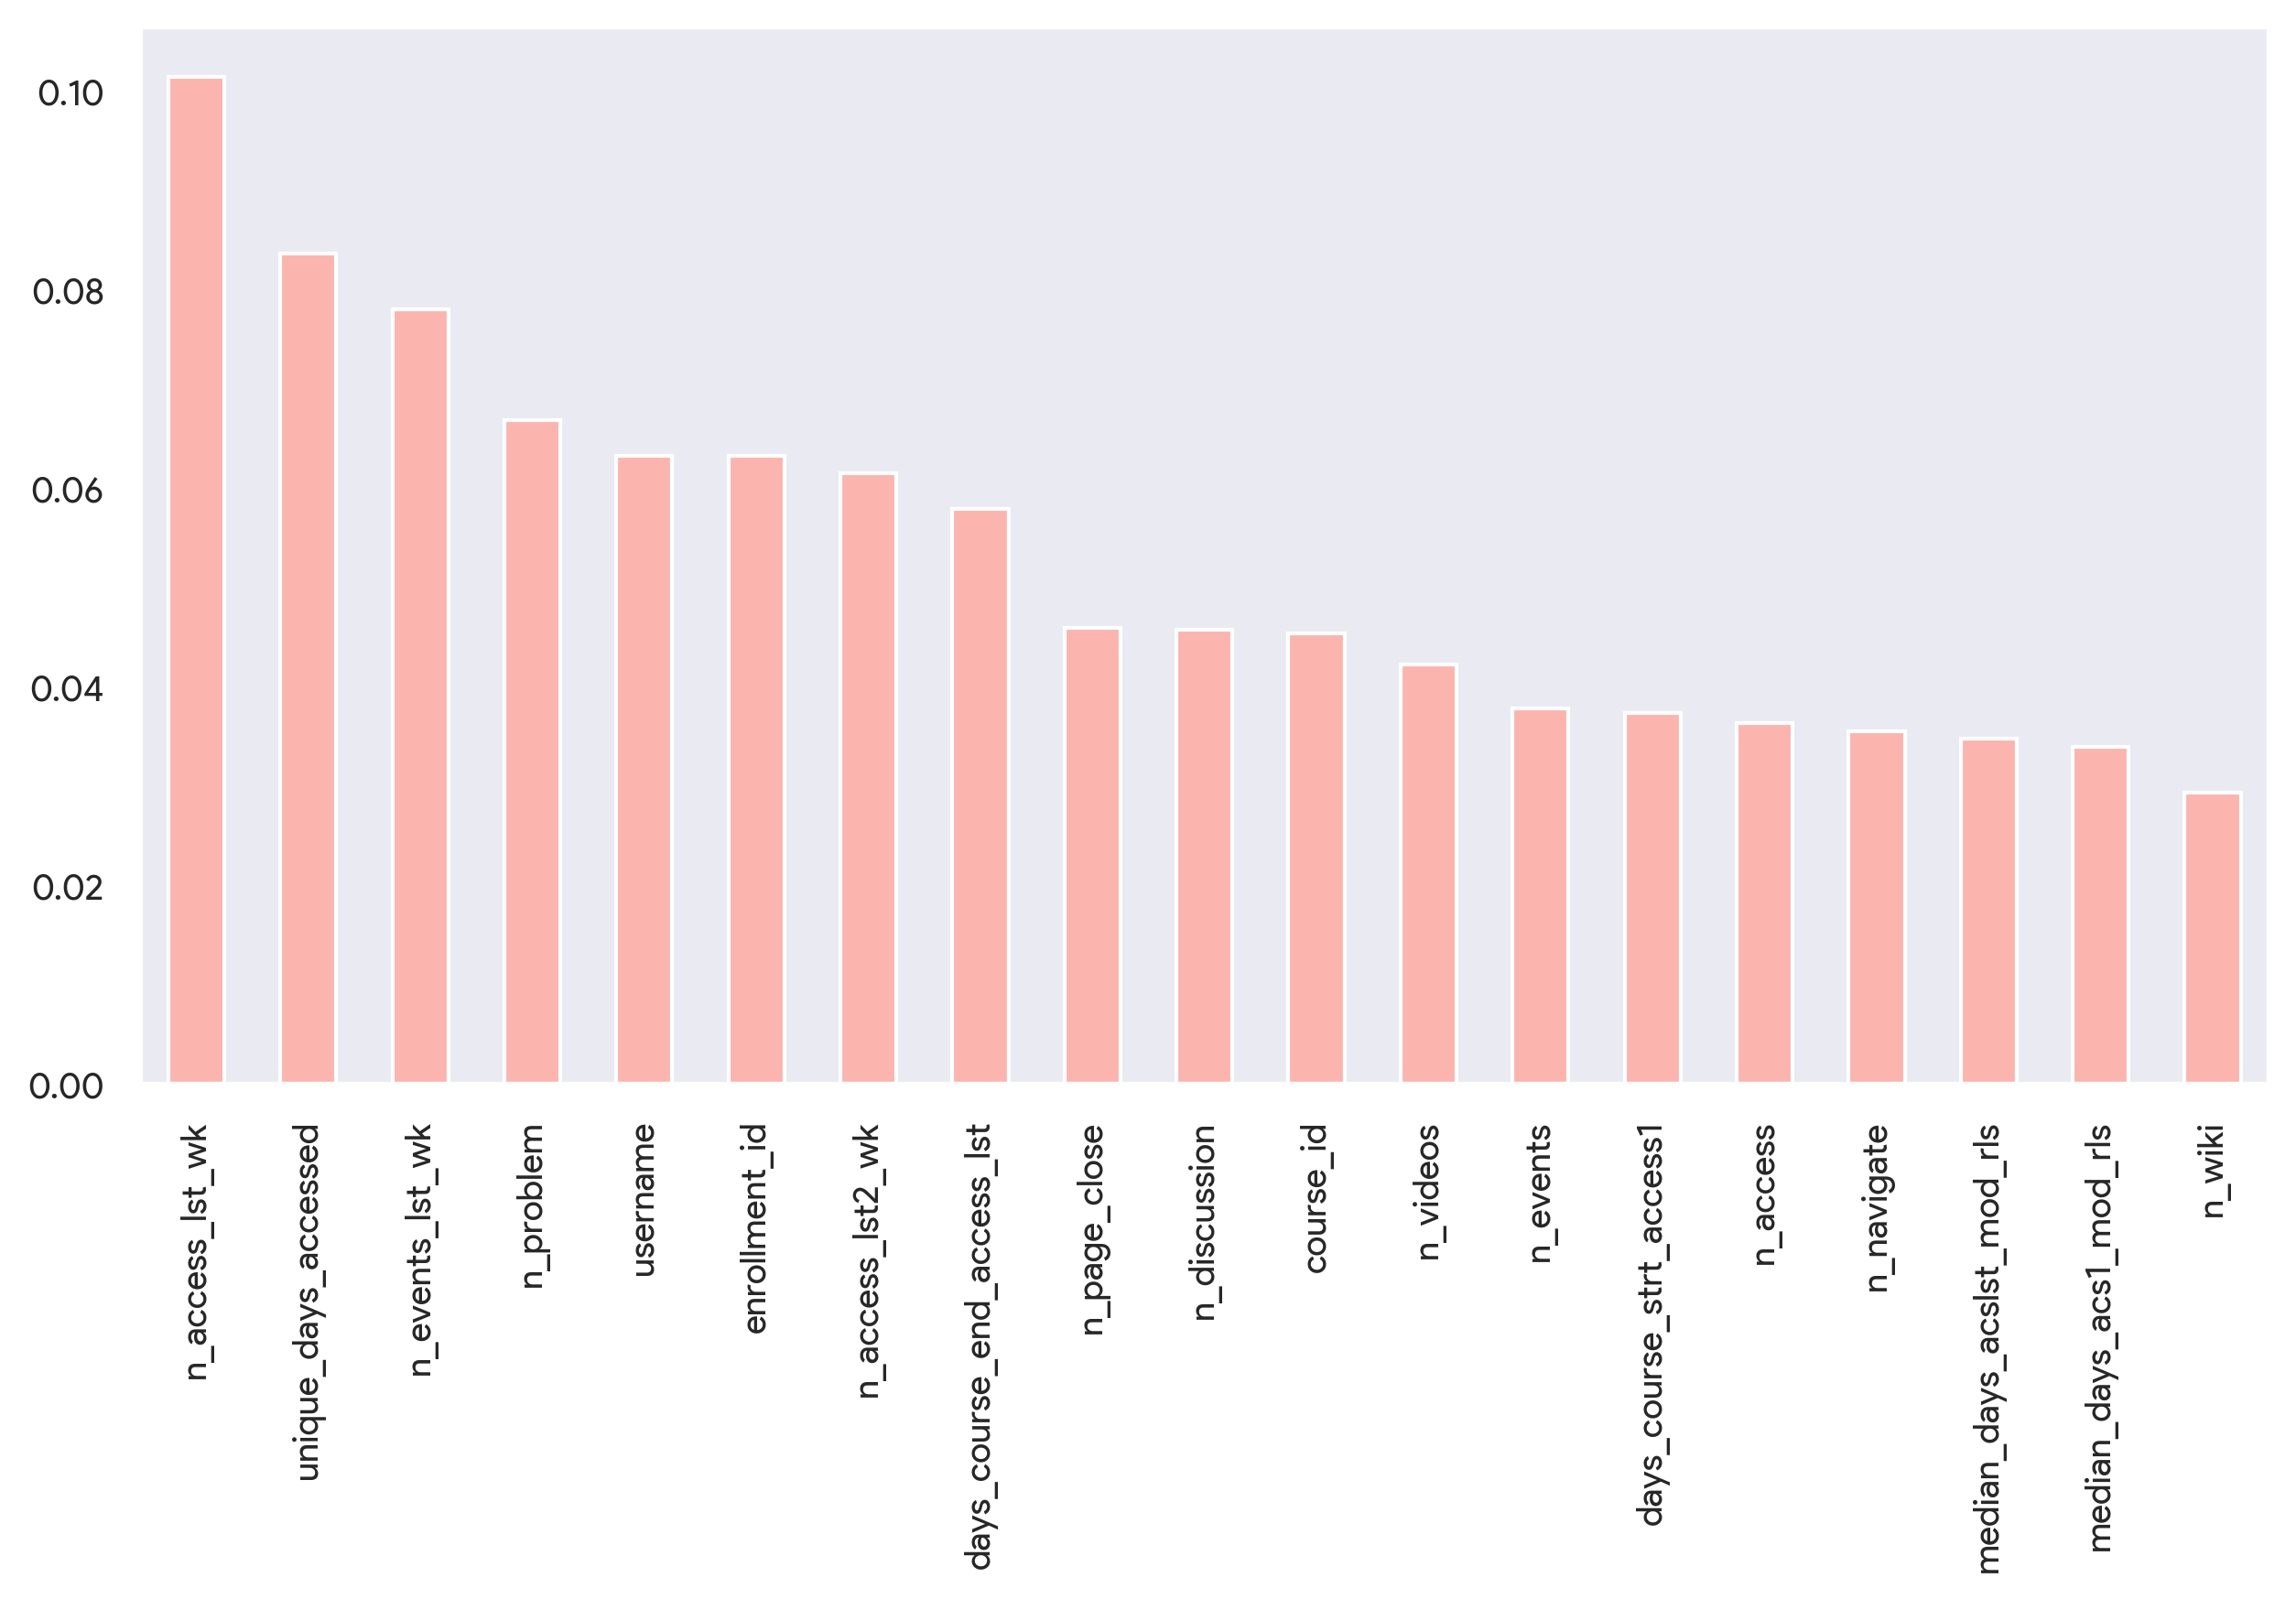

In [243]:
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
fig = plt.figure(figsize = (10,5), dpi = 300)
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
feature_importance.nlargest(20).plot(kind='bar')
plt.show()

# **heatmap plot for correlations between attributes**

<AxesSubplot: >

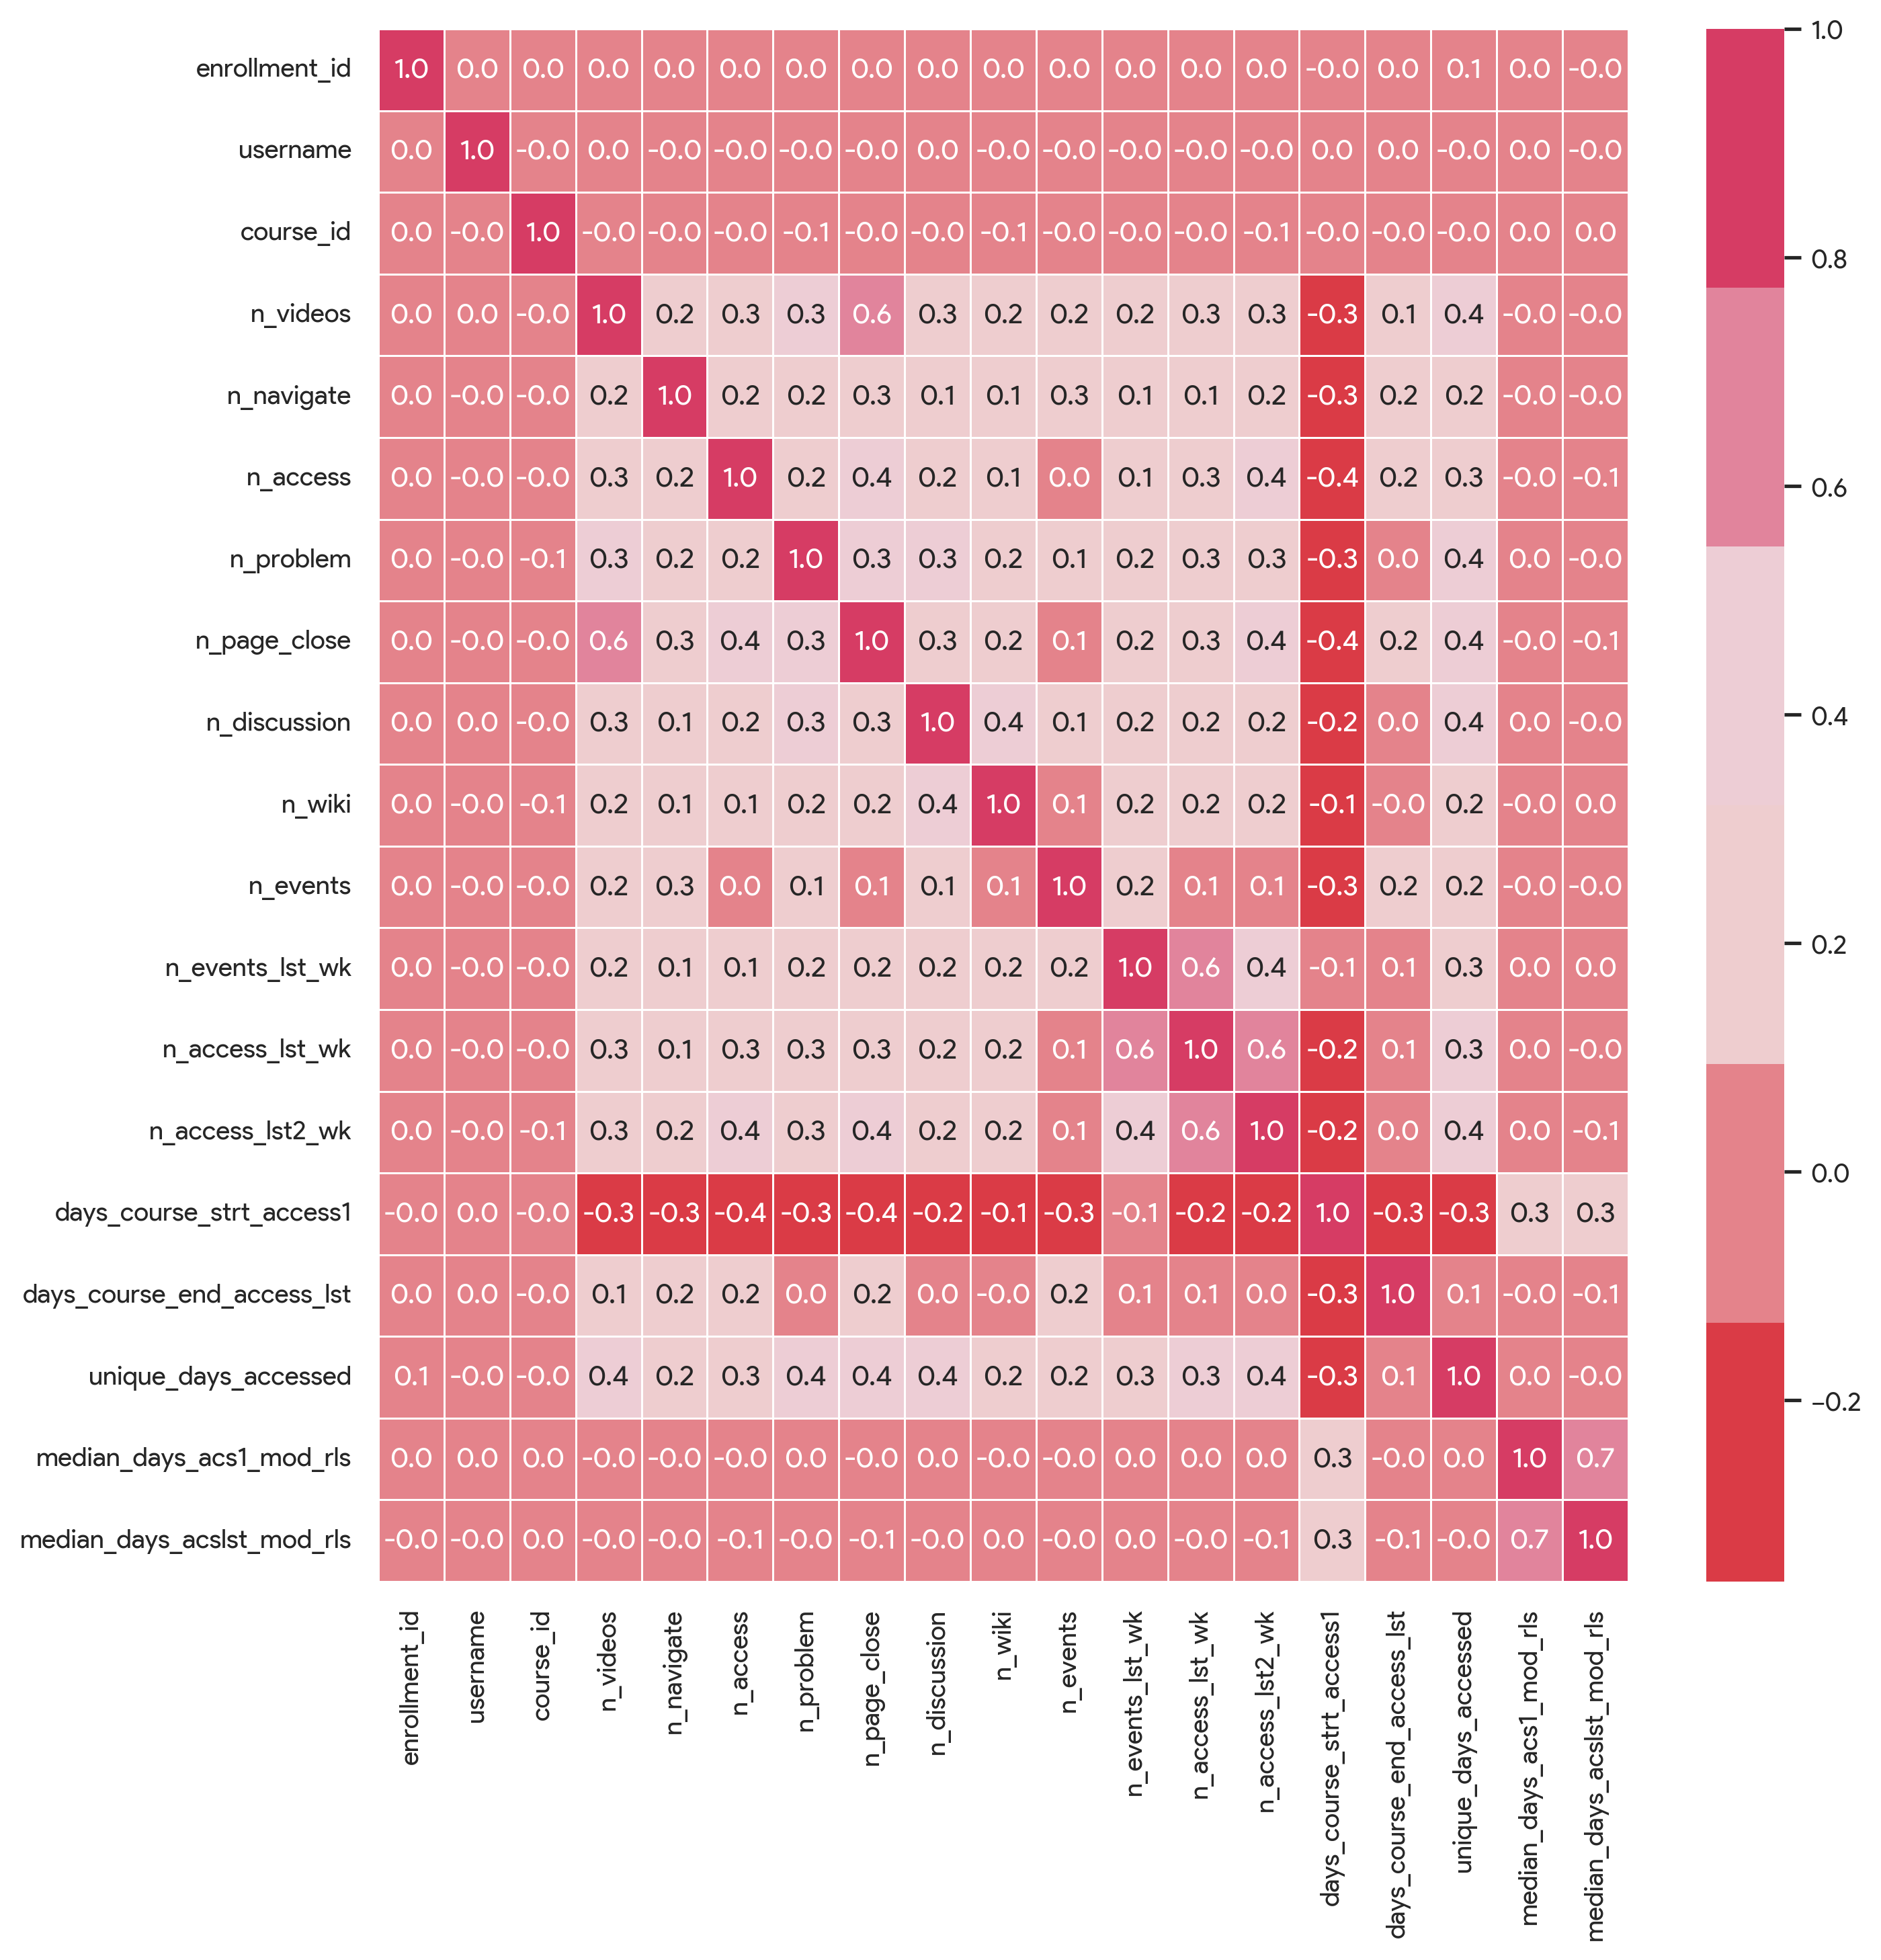

In [244]:

correlations  = X.corr()
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_theme(style = 'dark',font = 'product sans',font_scale = 0.85,palette = 'Pastel1')


cmap = sns.diverging_palette(10,2)
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, fmt = '0.1f',cmap=cmap, linewidths=0.7, annot=True,ax=ax)

# **Export all the algo models to /models directory**

In [245]:
import joblib

In [246]:
joblib.dump(clf,'../models/randomforest-edx.joblib')

['../models/randomforest-edx.joblib']

In [247]:
joblib.dump(xgb,'../models/xgb-edx.joblib')

['../models/xgb-edx.joblib']

In [248]:
joblib.dump(model,'../models/mlp-model-edx.joblib')

['../models/mlp-model-edx.joblib']

In [249]:
joblib.dump(gbm,'../models/gbm-edx.joblib')

['../models/gbm-edx.joblib']

# **Load the models and Evaluate**

In [250]:
# importing Random forest model
RF = joblib.load('../models/randomforest-edx.joblib')
rf_predic = RF.predict(P)
print(accuracy_score(rf_predic,q_test)*100,"%")

87.43729010323811 %


In [251]:
#importing Gradient Boost model
GB = joblib.load('../models/gbm-edx.joblib')
predic_gb = GB.predict(P)
print(accuracy_score(predic_gb,q_test)*100,"%")

87.46216675649903 %


In [252]:
#import XG Boost model
XG = joblib.load('../models/xgb-edx.joblib')
predic_xg = XG.predict(P)
print(accuracy_score(predic_xg,q_test)*100,"%")

83.5067788880136 %


In [255]:
#import MLP model
MLP = joblib.load('../models/mlp-model-edx.joblib')
predic_mlp = MLP.predict(P)
print(accuracy_score(predic_mlp,q_test)*100,"%")

87.17193913512169 %
